In [142]:
!pip install ace_tools

In [18]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [128]:
df = pd.read_csv(r"C:\Users\USER\OneDrive - The University of Memphis\Khulna University\BlueGreenSpace\EcologicalIndexGIS\Coding\RSEI_files\CCC_rmsi_index.csv")

In [129]:
before = df['rsei_16']
after = df['rsei_20']

In [130]:
# Perform the paired t-test
t_stat, p_value = stats.ttest_rel(before, after)

# Print results
print(f'T-statistic: {t_stat:.4f}')
print(f'P-value: {p_value:.4f}')

# Compute the difference
diff = after - before
mean_diff = np.mean(diff)  # Mean difference
std_diff = np.std(diff, ddof=1)  # Standard deviation of differences
cohen_d = mean_diff / std_diff  # Cohen's d calculation

print(f"Cohen's d: {cohen_d:.4f}")

T-statistic: 227.9681
P-value: 0.0000
Cohen's d: -0.4639


In [131]:
before = df['rsei_20']
after = df['rsei_24']
# Perform the paired t-test
t_stat, p_value = stats.ttest_rel(before, after)

# Print results
print(f'T-statistic: {t_stat:.4f}')
print(f'P-value: {p_value:.4f}')
# Compute the difference
diff = after - before
mean_diff = np.mean(diff)  # Mean difference
std_diff = np.std(diff, ddof=1)  # Standard deviation of differences
cohen_d = mean_diff / std_diff  # Cohen's d calculation

print(f"Cohen's d: {cohen_d:.4f}")

T-statistic: 583.3468
P-value: 0.0000
Cohen's d: -1.1871


Cohen's d: 0.1778


In [39]:
data_2016 = df['rsei_16']
data_2020 = df['rsei_20']
data_2024 = df['rsei_24']

F-statistic: 14663.7867
P-value: 0.0000


C:\Users\USER\AppData\Local\Temp\ipykernel_17200\1791996209.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data_2016, data_2020, data_2024], labels=['2016', '2020', '2024'])


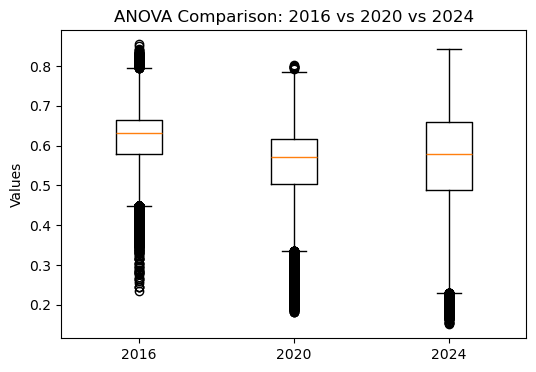

In [40]:
f_statistic, p_value = stats.f_oneway(data_2016, data_2020, data_2024)

# Print ANOVA results
print(f"F-statistic: {f_statistic:.4f}")
print(f"P-value: {p_value:.4f}")

# Boxplot to visualize the differences
plt.figure(figsize=(6,4))
plt.boxplot([data_2016, data_2020, data_2024], labels=['2016', '2020', '2024'])
plt.title("ANOVA Comparison: 2016 vs 2020 vs 2024")
plt.ylabel("Values")

# Show the plot
plt.show()

In [41]:
# Combine data into a single DataFrame for Tukey's test
data = np.concatenate([data_2016, data_2020, data_2024])
years = ['2016'] * len(data_2016) + ['2020'] * len(data_2020) + ['2024'] * len(data_2024)

df = pd.DataFrame({'Year': years, 'Value': data})

# Perform Tukey’s HSD test
tukey_results = pairwise_tukeyhsd(df['Value'], df['Year'])

# Display results
print(tukey_results)


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
  2016   2020  -0.0592   0.0 -0.0601 -0.0584   True
  2016   2024  -0.0467   0.0 -0.0475 -0.0458   True
  2020   2024   0.0126   0.0  0.0117  0.0134   True
---------------------------------------------------


In [42]:
# Calculate eta-squared (η²) for effect size in ANOVA
def eta_squared(f_stat, df_between, df_within):
    return f_stat * df_between / (f_stat * df_between + df_within)

# Degrees of freedom
df_between = 2  # Number of groups - 1 (2016, 2020, 2024 → 3 groups)
df_within = len(data_2016) + len(data_2020) + len(data_2024) - 3  # Total samples - number of groups

# Compute Eta-squared (effect size)
eta_sq = eta_squared(f_statistic, df_between, df_within)

# Print effect size result
print(f"Eta-squared (η²): {eta_sq:.4f}")

Eta-squared (η²): 0.0735


In [133]:
import os
import pandas as pd
import numpy as np
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Set folder path where your CSV files are stored
folder_path = r"C:\Users\USER\OneDrive - The University of Memphis\Khulna University\BlueGreenSpace\EcologicalIndexGIS\Coding\RSEI_files"

# Initialize an empty list to store city data
data_list = []

In [134]:
# Loop through all CSV files in the folder
for file in os.listdir(folder_path):
    if file.endswith(".csv"):  # Ensure only CSV files are processed
        city_name = file.replace(".csv", "")  # Extract city name from filename
        file_path = os.path.join(folder_path, file)
        
        # Load the CSV file
        df = pd.read_csv(file_path)
        
        # Ensure the columns for RSEI values are correctly named (update these if needed)
        rsei_2016 = df["rsei_16"]
        rsei_2020 = df["rsei_20"]
        rsei_2024 = df["rsei_24"]
        
        # Convert data into long format
        for i, row in df.iterrows():
            data_list.append([city_name, "2016", row["rsei_16"]])
            data_list.append([city_name, "2020", row["rsei_20"]])
            data_list.append([city_name, "2024", row["rsei_24"]])

In [136]:
# Create a DataFrame
df_combined = pd.DataFrame(data_list, columns=["City", "Year", "RSEI"])
# Convert 'Year' to categorical for statistical analysis
df_combined["Year"] = df_combined["Year"].astype(str)
# Display the first few rows
df_combined

,City,Year,RSEI
0,BCC_rmsi_index,2016,0.575477
1,BCC_rmsi_index,2020,0.615981
2,BCC_rmsi_index,2024,0.585618
3,BCC_rmsi_index,2016,0.613911
4,BCC_rmsi_index,2020,0.627047
...,...,...,...
5210068,SCC_rmsi_index,2020,0.509477
5210069,SCC_rmsi_index,2024,0.430974
5210070,SCC_rmsi_index,2016,0.592458
5210071,SCC_rmsi_index,2020,0.485700


In [137]:
# 1. ANOVA Test (Check if there are overall significant differences)
f_statistic, p_value = stats.f_oneway(
    df_combined[df_combined["Year"] == "2016"]["RSEI"],
    df_combined[df_combined["Year"] == "2020"]["RSEI"],
    df_combined[df_combined["Year"] == "2024"]["RSEI"]
)
print(f"ANOVA F-statistic: {f_statistic:.4f}, P-value: {p_value:.4f}")

ANOVA F-statistic: 30133.8126, P-value: 0.0000


In [138]:
# 2. Paired t-tests (To compare specific time periods)
def paired_t_test(df, year1, year2):
    group1 = df[df["Year"] == year1]["RSEI"]
    group2 = df[df["Year"] == year2]["RSEI"]
    t_stat, p_val = stats.ttest_rel(group1, group2)
    return t_stat, p_val

t_16_20, p_16_20 = paired_t_test(df_combined, "2016", "2020")
t_20_24, p_20_24 = paired_t_test(df_combined, "2020", "2024")
t_16_24, p_16_24 = paired_t_test(df_combined, "2016", "2024")

print(f"Paired t-test 2016 vs 2020: T-stat={t_16_20:.4f}, P-value={p_16_20:.4f}")
print(f"Paired t-test 2020 vs 2024: T-stat={t_20_24:.4f}, P-value={p_20_24:.4f}")
print(f"Paired t-test 2016 vs 2024: T-stat={t_16_24:.4f}, P-value={p_16_24:.4f}")

Paired t-test 2016 vs 2020: T-stat=132.2662, P-value=0.0000
Paired t-test 2020 vs 2024: T-stat=317.2941, P-value=0.0000
Paired t-test 2016 vs 2024: T-stat=381.5806, P-value=0.0000


In [139]:
# 3. Effect Size (Cohen’s d for paired comparisons)
def cohens_d(x, y):
    diff = x - y
    return np.mean(diff) / np.std(diff, ddof=1)

d_16_20 = cohens_d(df_combined[df_combined["Year"] == "2016"]["RSEI"],
                   df_combined[df_combined["Year"] == "2020"]["RSEI"])
d_20_24 = cohens_d(df_combined[df_combined["Year"] == "2020"]["RSEI"],
                   df_combined[df_combined["Year"] == "2024"]["RSEI"])
d_16_24 = cohens_d(df_combined[df_combined["Year"] == "2016"]["RSEI"],
                   df_combined[df_combined["Year"] == "2024"]["RSEI"])

print(f"Cohen’s d (Effect size) 2016 vs 2020: {d_16_20:.4f}")
print(f"Cohen’s d (Effect size) 2020 vs 2024: {d_20_24:.4f}")
print(f"Cohen’s d (Effect size) 2016 vs 2024: {d_16_24:.4f}")

# 4. Tukey’s HSD Test (If ANOVA is significant)
if p_value < 0.05:
    tukey = pairwise_tukeyhsd(df_combined["RSEI"], df_combined["Year"])
    print(tukey)


Cohen’s d (Effect size) 2016 vs 2020: nan
Cohen’s d (Effect size) 2020 vs 2024: nan
Cohen’s d (Effect size) 2016 vs 2024: nan
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
  2016   2020  -0.0066   0.0 -0.0068 -0.0064   True
  2016   2024  -0.0229   0.0 -0.0231 -0.0226   True
  2020   2024  -0.0163   0.0 -0.0165  -0.016   True
---------------------------------------------------


In [140]:
import os
import pandas as pd
import numpy as np
import scipy.stats as stats

# Set the folder path where your CSV files are stored
folder_path = r"C:\Users\USER\OneDrive - The University of Memphis\Khulna University\BlueGreenSpace\EcologicalIndexGIS\Coding\RSEI_files"  # Change this to your actual folder path

# Initialize a dictionary to store ANOVA results
anova_results = {}

# Loop through all CSV files in the folder
for file in os.listdir(folder_path):
    if file.endswith(".csv"):  # Process only CSV files
        city_name = file.replace(".csv", "")  # Extract city name from filename
        file_path = os.path.join(folder_path, file)
        
        # Load the CSV file
        df = pd.read_csv(file_path)

        # Ensure correct column names for RSEI values (Update if needed)
        if "rsei_16" in df.columns and "rsei_20" in df.columns and "rsei_24" in df.columns:
            rsei_2016 = df["rsei_16"].dropna()  # Drop missing values
            rsei_2020 = df["rsei_20"].dropna()
            rsei_2024 = df["rsei_24"].dropna()

            # Ensure enough data points exist for ANOVA
            if len(rsei_2016) > 1 and len(rsei_2020) > 1 and len(rsei_2024) > 1:
                # Perform ANOVA test
                f_stat, p_value = stats.f_oneway(rsei_2016, rsei_2020, rsei_2024)
                anova_results[city_name] = {"F-statistic": f_stat, "P-value": p_value}
            else:
                anova_results[city_name] = {"F-statistic": None, "P-value": "Not enough data"}

# Convert results into a DataFrame for better visualization
anova_df = pd.DataFrame.from_dict(anova_results, orient="index")

# Save results to a CSV file
anova_df.to_csv("city_wise_anova_results.csv")

# Display results
print("City-wise ANOVA Test Results:")
print(anova_df)


City-wise ANOVA Test Results:
                  F-statistic        P-value
BCC_rmsi_index     389.481489  1.430506e-169
CCC_rmsi_index   60265.392599   0.000000e+00
CuCC_rmsi_index    900.998933   0.000000e+00
DNCC_rmsi_index  17198.886963   0.000000e+00
DSCC_rmsi_index  15010.990932   0.000000e+00
GCC_rmsi_index   28193.559495   0.000000e+00
KCC_rmsi_index   23558.167232   0.000000e+00
MCC_rmsi_index   14663.786750   0.000000e+00
NCC_rmsi_index    4404.267969   0.000000e+00
RaCC_rmsi_index  14171.116557   0.000000e+00
RCC_rmsi_index    4199.203047   0.000000e+00
SCC_rmsi_index    7946.658775   0.000000e+00


In [2]:
import os
import pandas as pd
import numpy as np
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Set the folder path where your CSV files are stored
folder_path = r"C:\Users\USER\OneDrive - The University of Memphis\Khulna University\BlueGreenSpace\EcologicalIndexGIS\Coding\RSEI_files"

# Initialize an empty list to store city data
data_list = []

# Loop through all CSV files in the folder
for file in os.listdir(folder_path):
    if file.endswith(".csv"):  # Process only CSV files
        city_name = file.replace(".csv", "")  # Extract city name from filename
        file_path = os.path.join(folder_path, file)
        
        # Load the CSV file
        df = pd.read_csv(file_path)

        # Ensure the columns for RSEI values are correctly named (update these if needed)
        if "rsei_16" in df.columns and "rsei_20" in df.columns and "rsei_24" in df.columns:
            # Convert data into long format for Tukey's test
            for i, row in df.iterrows():
                data_list.append([city_name, "2016", row["rsei_16"]])
                data_list.append([city_name, "2020", row["rsei_20"]])
                data_list.append([city_name, "2024", row["rsei_24"]])

# Create a DataFrame
df_combined = pd.DataFrame(data_list, columns=["City", "Year", "RSEI"])

# Convert 'Year' to categorical
df_combined["Year"] = df_combined["Year"].astype(str)

# Perform Tukey’s HSD Test for each city
tukey_results = {}

for city in df_combined["City"].unique():
    city_data = df_combined[df_combined["City"] == city]
    
    # Run Tukey’s HSD test
    tukey = pairwise_tukeyhsd(city_data["RSEI"], city_data["Year"])
    
    # Store results
    tukey_results[city] = tukey.summary()

# Convert results into a dictionary format for better visualization
tukey_results_df = pd.DataFrame.from_dict(tukey_results, orient="index")

# Save results to a CSV file
tukey_results_df.to_csv("tukey_hsd_citywise.csv")

# Print Tukey’s test results for each city
for city, result in tukey_results.items():
    print(f"\nTukey’s HSD Test Results for {city}:")
    print(result)


Tukey’s HSD Test Results for BCC_rmsi_index:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
  2016   2020   0.0098    0.0 0.0087 0.0108   True
  2016   2024   0.0113    0.0 0.0103 0.0124   True
  2020   2024   0.0015 0.0013 0.0005 0.0026   True
--------------------------------------------------

Tukey’s HSD Test Results for CCC_rmsi_index:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
  2016   2020  -0.0209   0.0 -0.0214 -0.0204   True
  2016   2024  -0.0669   0.0 -0.0673 -0.0664   True
  2020   2024   -0.046   0.0 -0.0464 -0.0455   True
---------------------------------------------------

Tukey’s HSD Test Results for CuCC_rmsi_index:
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
-----------------------------------